# Coursework #7 - Visualization Project
Guillermo A. R.
27/03/2024

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
import scipy.io.wavfile as wav
import IPython.display as ipd
from bokeh.palettes import Magma256
plt.style.use('bmh')
%matplotlib widget

In [18]:
def load_wav(fname):
    # import audio
    srate, audio = wav.read(fname)
    # convert to float
    audio = audio.astype(np.float32) / 32767.0
    # make mono
    if (len(audio.shape) == 2):
        audio = (audio[:,0] + audio[:,1]) * 0.5
    # normalize
    audio = audio / np.max(audio) * 0.98
    return (audio, srate)

In [19]:
(audio, srate) = load_wav('in_my_life.wav')
ipd.Audio(audio, rate=srate)

In [20]:
FPS = 30
interval = 1e3 / FPS
SAMPLESIZE = int(interval / 1e3 * srate)
# Pad audio at end to match desired samplesize
audio = np.pad(audio, (0, SAMPLESIZE -  len(audio) % SAMPLESIZE))
SAMPLEVIEW = SAMPLESIZE * 40
NBFRAMES = int(np.floor(len(audio) / srate * FPS))

print('frames per second: ' +str(FPS))
print('interval between frames: ' +str(interval) + ' [ms]')
print('Total number of frames: ' + str(NBFRAMES) + ' frames')
print('Samples per frame: ' + str(SAMPLESIZE) + ' samples')

frames per second: 30
interval between frames: 33.333333333333336 [ms]
Total number of frames: 567 frames
Samples per frame: 1470 samples


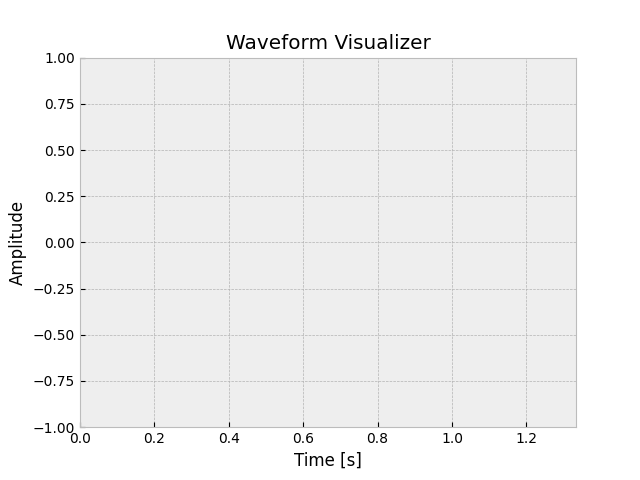

In [21]:
# set up plotting
fig = plt.figure()
ax = plt.axes(xlim=(0, SAMPLEVIEW/srate), ylim=(-1, 1))
ax.set_title('Waveform Visualizer')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
line = LineCollection([])
ax.add_collection(line)
x = np.arange(SAMPLEVIEW) / srate
colors = []

# methods for animation
def init():
    line.set_segments([])
    return line,

def animate(i, line):
    # Slice audio to display
    y = audio[i*SAMPLESIZE:i*SAMPLESIZE + SAMPLEVIEW]
    # Convert into line collection
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    # Add segments to object
    line.set_segments(segments)
    # Add color for every point
    colors = [Magma256[int(sample * (len(Magma256)-1))] for sample in np.abs(y)]
    line.set_color(colors)
    return line,

# create animation
ani = FuncAnimation(fig, animate, fargs=[line], init_func=init, frames=NBFRAMES, interval=interval, blit=True)
plt.show()

In [22]:
# save animation, this will stop the interactive plot
# ani.save('test.mp4', codec='h264', writer='ffmpeg')
ani.save('test.gif', writer='imagemagick', fps=FPS)

MovieWriter imagemagick unavailable; using Pillow instead.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.